<a href="https://colab.research.google.com/github/ErmaShafiraZ/Scraping_Blog_Medium/blob/main/Tugas_Algoritma_GLVQ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Program python untuk implementasi algoritma GLVQ dan Backpropagation pada klasifikasi

>Algoritma GLVQ

In [ ]:
!pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
support2 = fetch_ucirepo(id=880)

# data (as pandas dataframes)
X = support2.data.features
y = support2.data.targets

# metadata
print(support2.metadata)

# variable information
print(support2.variables)


{'uci_id': 880, 'name': 'SUPPORT2', 'repository_url': 'https://archive.ics.uci.edu/dataset/880/support2', 'data_url': 'https://archive.ics.uci.edu/static/public/880/data.csv', 'abstract': "This dataset comprises 9105 individual critically ill patients across 5 United States medical centers, accessioned throughout 1989-1991 and 1992-1994.\nEach row concerns hospitalized patient records who met the inclusion and exclusion criteria for nine disease categories: acute respiratory failure, chronic obstructive pulmonary disease, congestive heart failure, liver disease, coma, colon cancer, lung cancer, multiple organ system failure with malignancy, and multiple organ system failure with sepsis. The goal is to determine these patients' 2- and 6-month survival rates based on several physiologic, demographics, and disease severity information. \nIt is an important problem because it addresses the growing national concern over patients' loss of control near the end of life. It enables earlier deci

In [ ]:
import requests
import pandas as pd


url = "https://archive.ics.uci.edu/ml/machine-learning-databases/zoo/zoo.data"
filename = "zoo.data"


response = requests.get(url)
if response.status_code == 200:
    with open(filename, "wb") as file:
        file.write(response.content)
    print(f"Dataset telah diunduh dan disimpan sebagai {filename}")
else:
    print(f"Gagal mengunduh data. Status code: {response.status_code}")
    exit()


column_names = [
    "animal_name", "hair", "feathers", "eggs", "milk", "airborne",
    "aquatic", "predator", "toothed", "backbone", "breathes",
    "venomous", "fins", "legs", "tail", "domestic", "catsize", "class_type"
]

df = pd.read_csv(filename, names=column_names)

csv_filename = "zoo.csv"
df.to_csv(csv_filename, index=False)
print(f"Dataset telah dikonversi dan disimpan sebagai {csv_filename}")


Dataset telah diunduh dan disimpan sebagai zoo.data
Dataset telah dikonversi dan disimpan sebagai zoo.csv


In [ ]:
df = pd.read_csv("zoo.csv", header=0)

print(df.head())


  animal_name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
0    aardvark     1         0     0     1         0        0         1   
1    antelope     1         0     0     1         0        0         0   
2        bass     0         0     1     0         0        1         1   
3        bear     1         0     0     1         0        0         1   
4        boar     1         0     0     1         0        0         1   

   toothed  backbone  breathes  venomous  fins  legs  tail  domestic  catsize  \
0        1         1         1         0     0     4     0         0        1   
1        1         1         1         0     0     4     1         0        1   
2        1         1         0         0     1     0     1         0        0   
3        1         1         1         0     0     4     0         0        1   
4        1         1         1         0     0     4     1         0        1   

   class_type  
0           1  
1           1  
2           4  
3   

In [ ]:
df.shape

(101, 18)

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal_name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  class_type   101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [ ]:
df.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [ ]:
df.describe(include=["object", "bool"])

,animal_name
count,101
unique,100
top,frog
freq,2


In [ ]:
#membagi data pelatihan dan pengujian

from sklearn.model_selection import train_test_split

data = df.iloc[:, 1:-1].values  # Semua kolom kecuali pertama & terakhir
labels = df.iloc[:, -1].values  # Kolom terakhir sebagai target

print(f"Jumlah data: {len(data)}")
print(f"Jumlah label: {len(labels)}")
print(f"Label unik: {set(labels)}")
print("Kolom yang diambil sebagai fitur:", df.columns[1:-1])


X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)



Jumlah data: 101
Jumlah label: 101
Label unik: {1, 2, 3, 4, 5, 6, 7}
Kolom yang diambil sebagai fitur: Index(['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator',
       'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail',
       'domestic', 'catsize'],
      dtype='object')


In [ ]:
def euclidean_distance(x1, x2):
    return sum((a - b) ** 2 for a, b in zip(x1, x2)) ** 0.5


In [ ]:
# Inisialisasi prototipe
def initialize_prototypes(data, labels):
    unique_labels = set(labels)
    prototypes = {}

    for label in unique_labels:
        class_data = [list(map(float, x)) for x, y in zip(data, labels) if y == label]

        if len(class_data) == 0:
            print(f"Warning: Tidak ada data untuk kelas {label}, dilewati.")
            continue

        prototypes[label] = random.choice(class_data)  # Memilih angka, bukan string

    print("Prototypes setelah inisialisasi:", prototypes)

    return prototypes


In [ ]:
# Update prototipe
def update_prototypes(prototypes, data, labels, learning_rate=0.1):
    for x, label in zip(data, labels):
        closest_label = min(prototypes.keys(), key=lambda p: euclidean_distance(x, prototypes[p]))

        if closest_label == label:
            prototypes[closest_label] = [w + learning_rate * (xi - w) for w, xi in zip(prototypes[closest_label], x)]
        else:
            prototypes[closest_label] = [w - learning_rate * (xi - w) for w, xi in zip(prototypes[closest_label], x)]

    return prototypes

In [ ]:
# Prediksi
def predict(prototypes, x):
    return min(prototypes.keys(), key=lambda p: euclidean_distance(x, prototypes[p]))

# Evaluasi akurasi
def evaluate(prototypes, data, labels):
    correct = sum(1 for x, y in zip(data, labels) if predict(prototypes, x) == y)
    return correct / len(labels)

In [ ]:
import random


In [ ]:
# Inisialisasi prototipe sebelum training
prototypes = initialize_prototypes(X_train, y_train)

# Training GLVQ
for epoch in range(10):
    prototypes = update_prototypes(prototypes, X_train, y_train)  # Pakai data train
    acc = evaluate(prototypes, X_test, y_test)  # Evaluasi pakai data uji
    print(f"Epoch {epoch+1}, Akurasi: {acc:.2f}")

Prototypes setelah inisialisasi: {1: [1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 4.0, 0.0, 0.0, 1.0], 2: [0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 2.0, 1.0, 0.0, 1.0], 3: [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0], 4: [0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0], 5: [0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 4.0, 0.0, 0.0, 0.0], 6: [0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 6.0, 0.0, 0.0, 0.0], 7: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 8.0, 1.0, 0.0, 0.0]}
Epoch 1, Akurasi: 0.86
Epoch 2, Akurasi: 0.86
Epoch 3, Akurasi: 0.86
Epoch 4, Akurasi: 0.86
Epoch 5, Akurasi: 0.86
Epoch 6, Akurasi: 0.86
Epoch 7, Akurasi: 0.86
Epoch 8, Akurasi: 0.86
Epoch 9, Akurasi: 0.86
Epoch 10, Akurasi: 0.86


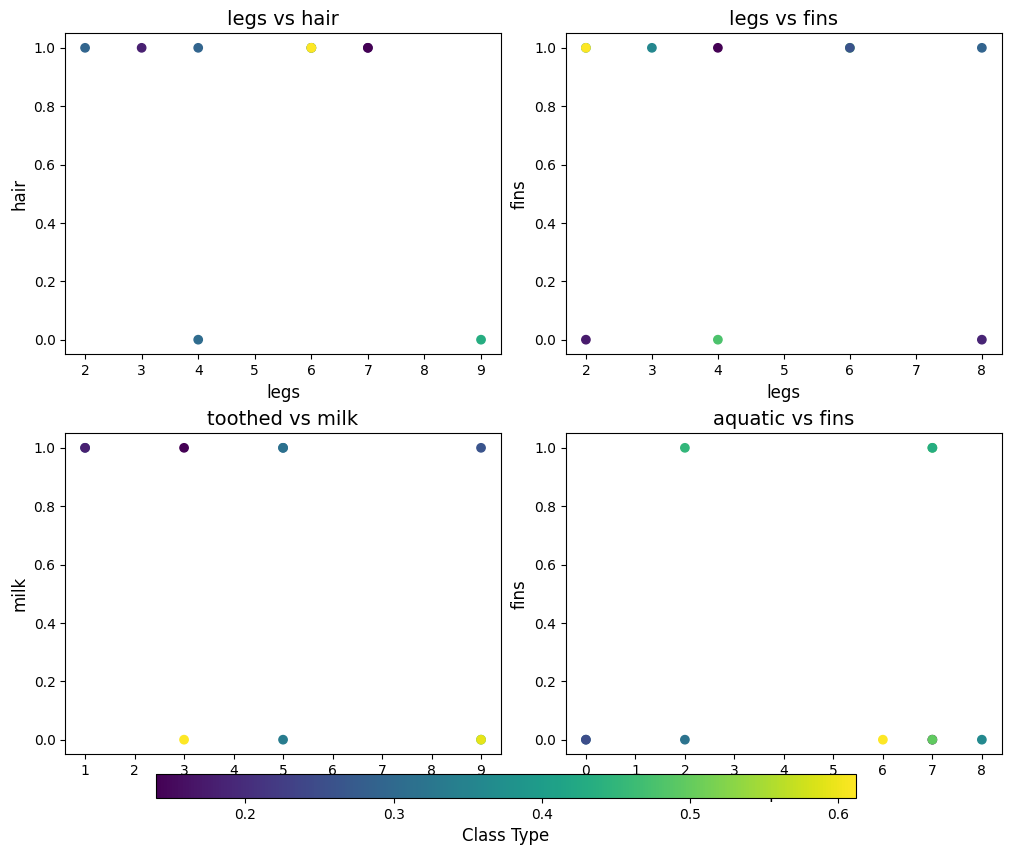

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Contoh data random
np.random.seed(42)
x_features = ["legs", "legs", "toothed", "aquatic"]
y_features = ["hair", "fins", "milk", "fins"]

fig, axes = plt.subplots(2, 2, figsize=(10, 8), constrained_layout=True)

scatters = []

for ax, x_feat, y_feat in zip(axes.flatten(), x_features, y_features):
    x = np.random.randint(0, 10, 10)  # Data x
    y = np.random.randint(0, 2, 10)   # Data y
    scatter = ax.scatter(x, y, c=np.random.rand(10), cmap="viridis")

    scatters.append(scatter)

    ax.set_xlabel(x_feat, fontsize=12)
    ax.set_ylabel(y_feat, fontsize=12)
    ax.set_title(f"{x_feat} vs {y_feat}", fontsize=14)
cbar_ax = fig.add_axes([0.15, 0.01, 0.7, 0.03])  # [left, bottom, width, height]
cbar = plt.colorbar(scatters[0], cax=cbar_ax, orientation="horizontal")
cbar.set_label("Class Type", fontsize=12)

plt.show()


> Algoritma Backpropagation

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
!pip install scikit-learn

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/zoo/zoo.data"
columns = ["animal_name", "hair", "feathers", "eggs", "milk", "airborne", "aquatic", "predator", "toothed",
           "backbone", "breathes", "venomous", "fins", "legs", "tail", "domestic", "catsize", "class_type"]
data = pd.read_csv(url, names=columns)

data.drop("animal_name", axis=1, inplace=True)  # Remove animal names

In [ ]:
X = data.drop("class_type", axis=1).values
y = data["class_type"].values.reshape(-1, 1)

In [ ]:
encoder = OneHotEncoder(sparse_output=False)
y_encoded = encoder.fit_transform(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.metrics import accuracy_score


In [ ]:
model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(8, activation='relu'),
    Dense(y_encoded.shape[1], activation='softmax')  # Output layer
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=100, batch_size=5, validation_data=(X_test, y_test))

loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.0371 - loss: 2.1820 - val_accuracy: 0.0952 - val_loss: 1.8204
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0810 - loss: 2.0011 - val_accuracy: 0.1429 - val_loss: 1.6960
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2613 - loss: 1.7782 - val_accuracy: 0.5238 - val_loss: 1.5719
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4670 - loss: 1.6406 - val_accuracy: 0.6190 - val_loss: 1.4522
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4513 - loss: 1.6480 - val_accuracy: 0.6667 - val_loss: 1.3222
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3972 - loss: 1.5398 - val_accuracy: 0.6667 - val_loss: 1.2009
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4939 - loss: 1.3473 - val_accuracy: 0.6667 - val_loss: 1.0904
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5704 - loss: 1.2715 - val_accuracy: 0.6667 - val_loss: 1.